<a href="https://colab.research.google.com/github/Barbara-Morais/Exercicios-Bootcamp/blob/main/GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd


In [2]:
df_social = pd.read_csv('https://raw.githubusercontent.com/CharlesPrado23/Bootcamp2oSemestre2021/main/Semana8/Social_Network_Ads.csv')
df_social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Male','Female'])
df_social[['Gender']] = le_sex.transform(df_social.Gender)

In [4]:
X=df_social[['Age','EstimatedSalary']]

y = df_social.Purchased

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [6]:
knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('mms', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__leaf_size': [15, 20],
                          'knn__n_neighbors': [3, 5, 7, 9],
                          'knn__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [7]:
gs_knn.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}

In [8]:
# find best model score
gs_knn.score(X_train, y_train)

0.9357142857142857

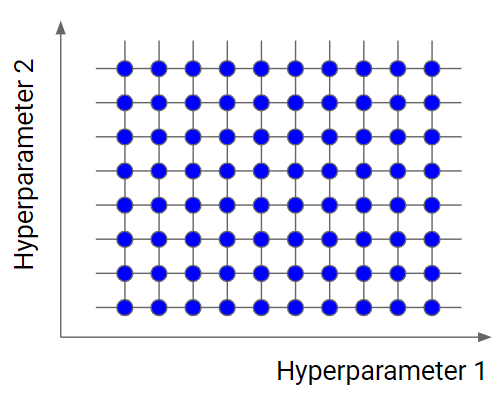

In [9]:
print('\"I\'m\"\n \""learning\""\n \"""Python\"""\n')

"I'm"
 ""learning""
 """Python"""



In [10]:
print()